In [1]:
#Reading the csv file and importing the packages

import tensorflow as tf
import keras
import pandas as pd
import matplotlib
import sklearn

In [44]:
df = pd.read_csv('C:/Users/vd21aaf/Downloads/V Dass ML project MRI data adjusted.csv')

In [45]:
df

,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_InterquartileRange,original_firstorder_Maximum,original_firstorder_Mean,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Median,original_firstorder_Minimum,original_firstorder_Range,...,original_ngtdm_Strength,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_Maximum2DDiameterRow,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_SurfaceArea,original_shape_VoxelVolume,Visit,Phenotype
0,656.7,1087.2,52635278,273.00,1254,890.000000,148.531250,930.5,512,742,...,145.012293,0.524237,5.391038,10.609872,196.508144,7.891899,248.281904,229.708150,1,1
1,749.6,1050.8,73438453,110.75,1182,928.702381,79.887755,937.5,664,518,...,130.943159,0.172445,3.798513,20.014171,540.769981,10.715821,553.791501,602.982457,1,1
2,633.0,900.6,171389630,133.50,1061,746.615894,81.789658,731.5,561,500,...,67.377874,0.685238,9.584122,16.993051,1044.753345,12.300677,658.375703,1083.935334,1,1
3,670.8,1015.4,69833365,217.00,1079,839.453608,101.989584,829.0,616,463,...,176.571547,0.472571,6.044911,13.238733,380.276080,10.083800,398.193908,417.783253,1,0
4,691.5,962.6,59052014,140.00,1193,811.409091,89.110537,786.5,574,619,...,146.727773,0.379708,6.136799,15.976338,422.994730,9.989535,447.952095,483.422548,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,631.7,1078.2,276567765,222.50,1434,838.309524,136.235954,814.0,522,912,...,60.950114,0.395757,7.339786,17.756068,1310.652806,15.260054,855.049653,1356.714086,0,1
148,939.8,1649.7,399790559,371.75,1844,1286.693966,212.377118,1267.5,636,1208,...,148.965185,0.131783,3.419642,26.422064,782.146712,13.468538,725.958412,832.694626,0,0
149,519.1,1083.7,447221797,278.00,1731,752.450138,177.220245,703.5,0,1731,...,33.811202,0.448307,10.231552,24.951140,2516.624482,18.032452,1348.693395,2591.399396,0,1
150,613.5,1168.0,329399357,300.00,2250,881.356061,179.674166,859.0,260,1990,...,42.463724,0.670010,11.159004,16.828284,1374.062060,11.976658,798.473117,1421.319745,0,1


In [46]:
dataset = df.values

In [47]:
#converting the pandas dataframe into array
dataset

array([[6.56700000e+02, 1.08720000e+03, 5.26352780e+07, ...,
        2.29708150e+02, 1.00000000e+00, 1.00000000e+00],
       [7.49600000e+02, 1.05080000e+03, 7.34384530e+07, ...,
        6.02982457e+02, 1.00000000e+00, 1.00000000e+00],
       [6.33000000e+02, 9.00600000e+02, 1.71389630e+08, ...,
        1.08393533e+03, 1.00000000e+00, 1.00000000e+00],
       ...,
       [5.19100000e+02, 1.08370000e+03, 4.47221797e+08, ...,
        2.59139940e+03, 0.00000000e+00, 1.00000000e+00],
       [6.13500000e+02, 1.16800000e+03, 3.29399357e+08, ...,
        1.42131975e+03, 0.00000000e+00, 1.00000000e+00],
       [6.74000000e+02, 1.33180000e+03, 5.15968593e+08, ...,
        1.81254159e+03, 0.00000000e+00, 1.00000000e+00]])

In [48]:
# splitting the dataset into our input features and the label we wish to predict
X = dataset[:,0:28]
Y = dataset[:,28]

In [49]:
# Data Normalization
# scaling the data to be betweeen 0 and 1
from sklearn import preprocessing

In [50]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [51]:
X_scale

array([[0.32897325, 0.38221191, 0.02224972, ..., 0.04245648, 0.01585978,
        1.        ],
       [0.42033832, 0.35406032, 0.0335045 , ..., 0.14062852, 0.05926524,
        1.        ],
       [0.30566483, 0.23789637, 0.0864973 , ..., 0.17423547, 0.11519191,
        1.        ],
       ...,
       [0.19364673, 0.37950503, 0.23572594, ..., 0.39606122, 0.2904844 ,
        0.        ],
       [0.28648702, 0.44470224, 0.17198253, ..., 0.21925418, 0.15442399,
        0.        ],
       [0.34598741, 0.57138438, 0.27291881, ..., 0.35404783, 0.19991645,
        0.        ]])

In [ ]:
# Splitting the dataset into test and validation set

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [54]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [55]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(106, 28) (23, 28) (23, 28) (106,) (23,) (23,)


In [ ]:
# Building and Training Our First Neural Network
# Using Keras to build the neural network architecture


In [56]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# Using TensorFlow backend.
# We will be using the Sequential model, which means that we merely need to describe the layers above in sequence. 
# Our neural network has three layers:
# Hidden layer 1: 30 neurons, ReLU activation
# Hidden layer 2: 30 neurons, ReLU activation
# Output Layer: 1 neuron, Sigmoid activation

In [57]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(28,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [ ]:
# Before we start our training, we have to configure the model by

# Telling it what algorithm you want to use to do the optimization (we'll use stochastic gradient descent)
# Telling it what loss function to use (for binary classification, we will use binary cross entropy)
# Telling it what other metrics you want to track apart from the loss function (we want to track accuracy as well)

In [58]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# The function is called 'fit' as we are fitting the parameters to the data. We specify:

what data we are training on, which is X_train and Y_train
the size of our mini-batch
how long we want to train it for (epochs)
what our validation data is so that the model will tell us how we are doing on the validation data at each point.

In [59]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
4/4 [==============================] - 0s 58ms/step - loss: 0.7910 - accuracy: 0.3585 - val_loss: 0.7116 - val_accuracy: 0.4783
Epoch 2/100
4/4 [==============================] - 0s 6ms/step - loss: 0.7809 - accuracy: 0.3585 - val_loss: 0.7072 - val_accuracy: 0.4783
Epoch 3/100
4/4 [==============================] - 0s 6ms/step - loss: 0.7724 - accuracy: 0.3585 - val_loss: 0.7030 - val_accuracy: 0.4783
Epoch 4/100
4/4 [==============================] - 0s 7ms/step - loss: 0.7641 - accuracy: 0.3585 - val_loss: 0.6997 - val_accuracy: 0.4783
Epoch 5/100
4/4 [==============================] - 0s 7ms/step - loss: 0.7575 - accuracy: 0.3585 - val_loss: 0.6966 - val_accuracy: 0.4783
Epoch 6/100
4/4 [==============================] - 0s 7ms/step - loss: 0.7511 - accuracy: 0.3585 - val_loss: 0.6938 - val_accuracy: 0.4783
Epoch 7/100
4/4 [==============================] - 0s 8ms/step - loss: 0.7451 - accuracy: 0.3585 - val_loss: 0.6913 - val_accuracy: 0.4783
Epoch 8/100
4/4 [=========

In [60]:
model.evaluate(X_test, Y_test)[1]

1/1 [==============================] - 0s 3ms/step - loss: 0.6577 - accuracy: 0.6087


0.6086956262588501

In [61]:
import matplotlib.pyplot as plt

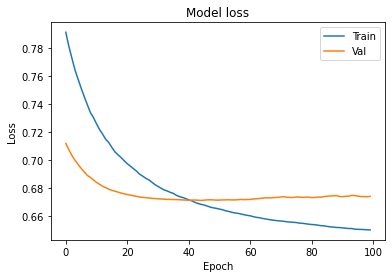

In [62]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

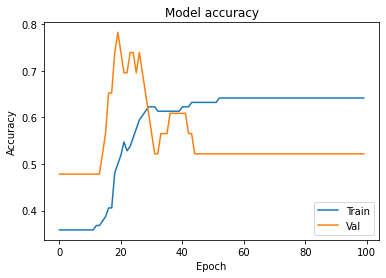

In [64]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [ ]:
# Train a model which will overfit, Model2

In [65]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(28,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
4/4 [==============================] - 0s 72ms/step - loss: 0.6692 - accuracy: 0.6415 - val_loss: 0.6810 - val_accuracy: 0.5217
Epoch 2/100
4/4 [==============================] - 0s 26ms/step - loss: 0.6272 - accuracy: 0.6415 - val_loss: 0.6571 - val_accuracy: 0.6522
Epoch 3/100
4/4 [==============================] - 0s 26ms/step - loss: 0.6558 - accuracy: 0.5849 - val_loss: 0.5989 - val_accuracy: 0.5217
Epoch 4/100
4/4 [==============================] - 0s 24ms/step - loss: 0.6224 - accuracy: 0.6415 - val_loss: 0.6051 - val_accuracy: 0.5217
Epoch 5/100
4/4 [==============================] - 0s 27ms/step - loss: 0.5749 - accuracy: 0.6604 - val_loss: 0.5997 - val_accuracy: 0.6087
Epoch 6/100
4/4 [==============================] - 0s 25ms/step - loss: 0.5707 - accuracy: 0.7075 - val_loss: 0.6645 - val_accuracy: 0.5652
Epoch 7/100
4/4 [==============================] - 0s 27ms/step - loss: 0.5614 - accuracy: 0.7075 - val_loss: 0.7035 - val_accuracy: 0.6522
Epoch 8/100
4/4 [===

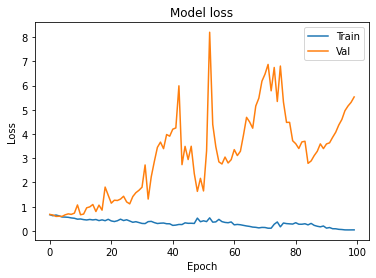

In [66]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

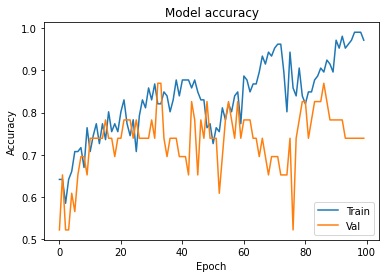

In [67]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [ ]:
# To address the overfitting we see in Model 2, we'll incorporate L2 regularization and dropout in our third model here 
# (Model 3)

In [68]:
from keras.layers import Dropout
from keras import regularizers

In [69]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(28,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [70]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
4/4 [==============================] - 1s 145ms/step - loss: 29.4413 - accuracy: 0.6038 - val_loss: 25.3649 - val_accuracy: 0.5217
Epoch 2/100
4/4 [==============================] - 0s 37ms/step - loss: 23.7219 - accuracy: 0.6415 - val_loss: 20.2649 - val_accuracy: 0.5217
Epoch 3/100
4/4 [==============================] - 0s 36ms/step - loss: 18.8764 - accuracy: 0.6415 - val_loss: 15.9742 - val_accuracy: 0.5217
Epoch 4/100
4/4 [==============================] - 0s 36ms/step - loss: 14.8242 - accuracy: 0.6415 - val_loss: 12.4423 - val_accuracy: 0.5217
Epoch 5/100
4/4 [==============================] - 0s 37ms/step - loss: 11.5189 - accuracy: 0.6415 - val_loss: 9.5949 - val_accuracy: 0.5217
Epoch 6/100
4/4 [==============================] - 0s 36ms/step - loss: 8.8601 - accuracy: 0.6415 - val_loss: 7.3423 - val_accuracy: 0.5217
Epoch 7/100
4/4 [==============================] - 0s 36ms/step - loss: 6.7677 - accuracy: 0.6415 - val_loss: 5.5979 - val_accuracy: 0.5217
Epoch 8/10

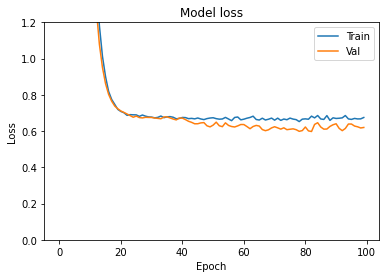

In [71]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

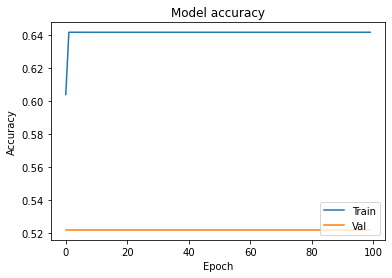

In [72]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()